In [1]:
import pandas as pd
df = pd.read_csv('./done_data/new_house_merge.csv')
print(df.columns)
print(df.shape)
df.head(1)

Index(['鄉鎮市區', '土地移轉總坪數', '都市土地使用分區', '總樓層數', '主要用途', '主要建材', '建物移轉總坪數',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '每坪單價',
       '車位類別', '車位移轉總坪數', '土地', '建物', '車位', '轉移樓層', '建物類型', 'Area',
       'EightCount', 'ParkCount', 'FuneralCount', 'GasCount', 'CrimeCount',
       'PoliceCount', 'busCount', 'subwayCount', 'govCount', 'clinicCount',
       'hospitalCount', 'pharmacyCount', 'fireareaCount', 'firewayCount',
       '土地面積', '總人口數', '男性人數', '女性人數', '人口密度', '每戶人數', '每戶成年人數', '所得收入總計',
       '可支配所得', '消費支出', '儲蓄', '所得總額'],
      dtype='object')
(5252, 47)


,鄉鎮市區,土地移轉總坪數,都市土地使用分區,總樓層數,主要用途,主要建材,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,中正區,5.599275,住,13,住家用,混凝土造,46.001177,3,2,2,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842


In [2]:
# 移除無法線性化的特徵

df = df.drop(['Area','鄉鎮市區','都市土地使用分區','主要用途','主要建材','建物現況格局-隔間','有無管理組織','車位類別','建物類型'], axis = 1)

df.head()

,土地移轉總坪數,總樓層數,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,每坪單價,車位移轉總坪數,土地,建物,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,5.599275,13,46.001177,3,2,2,9.726710e+05,7.447550,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
1,4.652450,10,36.191101,1,1,1,1.040879e+06,13.421926,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
2,5.154600,10,38.656476,1,1,1,9.332429e+05,13.421926,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
3,5.112250,10,25.234551,1,1,1,9.479074e+05,0.000000,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
4,5.154600,10,38.656476,1,1,1,9.729884e+05,13.424951,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842


In [3]:
# 將x,y拆開
y_df = df['每坪單價']
x_df = df.drop(['每坪單價'], axis = 1)
x_df.head()

,土地移轉總坪數,總樓層數,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總坪數,土地,建物,車位,...,男性人數,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額
0,5.599275,13,46.001177,3,2,2,7.447550,1,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
1,4.652450,10,36.191101,1,1,1,13.421926,1,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
2,5.154600,10,38.656476,1,1,1,13.421926,1,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
3,5.112250,10,25.234551,1,1,1,0.000000,1,1,0,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842
4,5.154600,10,38.656476,1,1,1,13.424951,1,1,1,...,73997,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842


In [4]:
# 透過皮爾森分析確認各變數彼此相關大於0.9的變數
x_corr_df = x_df.corr('pearson')
x_corr_df = x_corr_df[(x_corr_df > 0.9) & (x_corr_df != 1.0)]
x_corr_df = x_corr_df.dropna(axis=1, how='all')
x_corr_df = x_corr_df.dropna(axis=0, how='all')
x_corr_df

,EightCount,FuneralCount,busCount,土地面積,總人口數,男性人數,女性人數,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,所得總額
EightCount,NaN,0.922541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FuneralCount,0.922541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busCount,NaN,NaN,NaN,0.931076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
土地面積,NaN,NaN,0.931076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
總人口數,NaN,NaN,NaN,NaN,NaN,0.997988,0.998441,NaN,NaN,NaN,NaN,NaN,NaN
男性人數,NaN,NaN,NaN,NaN,0.997988,NaN,0.992893,NaN,NaN,NaN,NaN,NaN,NaN
女性人數,NaN,NaN,NaN,NaN,0.998441,0.992893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
每戶人數,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956491,NaN,NaN,NaN,NaN
每戶成年人數,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956491,NaN,NaN,NaN,NaN,NaN
所得收入總計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964533,NaN,0.993272


<b>有出現共線性問題的特徵</b><br>
1、總人口數與男性人數、女性人數高度相關，故僅移除男性人數、女性人數<br>
2、每戶人數與每戶成年人數高度相關，移除每戶成年人數<br>
3、所得收入總計、消費支出、所得總額高度相關，所以移除所得收入總計、消費支出<br>
4、busCount、高度相關，移除busCount<br>
5、EightCount、FuneralCount高度相關，移除EightCount<br>


In [5]:
# 移除有共線性問題的特徵
x_df = x_df.drop(['男性人數','女性人數','每戶成年人數','所得收入總計','可支配所得','消費支出','busCount','EightCount'], axis = 1)
print(len(x_df.columns))
x_df.head()

29


,土地移轉總坪數,總樓層數,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總坪數,土地,建物,車位,...,hospitalCount,pharmacyCount,fireareaCount,firewayCount,土地面積,總人口數,人口密度,每戶人數,儲蓄,所得總額
0,5.599275,13,46.001177,3,2,2,7.447550,1,1,1,...,3,64,41,38,7.6071,155508,20442,2.83,278646,1894842
1,4.652450,10,36.191101,1,1,1,13.421926,1,1,1,...,3,64,41,38,7.6071,155508,20442,2.83,278646,1894842
2,5.154600,10,38.656476,1,1,1,13.421926,1,1,1,...,3,64,41,38,7.6071,155508,20442,2.83,278646,1894842
3,5.112250,10,25.234551,1,1,1,0.000000,1,1,0,...,3,64,41,38,7.6071,155508,20442,2.83,278646,1894842
4,5.154600,10,38.656476,1,1,1,13.424951,1,1,1,...,3,64,41,38,7.6071,155508,20442,2.83,278646,1894842


In [6]:
# 利用方差先找出沒有差距的特徵，發現建物並沒有足夠變異
# 0.25是以某個值不超過0.5計算，0.5X0.5=0.25
# 移除了
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.25)
selector.fit_transform(x_df)
cols = selector.get_support(indices=True)

features_df_new = x_df.iloc[:,cols].columns
new_feature_list = features_df_new.tolist()
old_feature_list = x_df.columns.tolist()

lost_element = [x for x in old_feature_list if x not in new_feature_list]
print(new_feature_list)
print(lost_element)

['土地移轉總坪數', '總樓層數', '建物移轉總坪數', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '車位移轉總坪數', '土地', '車位', '轉移樓層', 'ParkCount', 'FuneralCount', 'GasCount', 'CrimeCount', 'PoliceCount', 'subwayCount', 'govCount', 'clinicCount', 'hospitalCount', 'pharmacyCount', 'fireareaCount', 'firewayCount', '土地面積', '總人口數', '人口密度', '儲蓄', '所得總額']
['建物', '每戶人數']


In [7]:
# 只選擇有足夠變異的變數
x_df = x_df[new_feature_list]
x_df.head()

,土地移轉總坪數,總樓層數,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總坪數,土地,車位,轉移樓層,...,clinicCount,hospitalCount,pharmacyCount,fireareaCount,firewayCount,土地面積,總人口數,人口密度,儲蓄,所得總額
0,5.599275,13,46.001177,3,2,2,7.447550,1,1,10,...,290,3,64,41,38,7.6071,155508,20442,278646,1894842
1,4.652450,10,36.191101,1,1,1,13.421926,1,1,2,...,290,3,64,41,38,7.6071,155508,20442,278646,1894842
2,5.154600,10,38.656476,1,1,1,13.421926,1,1,3,...,290,3,64,41,38,7.6071,155508,20442,278646,1894842
3,5.112250,10,25.234551,1,1,1,0.000000,1,0,4,...,290,3,64,41,38,7.6071,155508,20442,278646,1894842
4,5.154600,10,38.656476,1,1,1,13.424951,1,1,5,...,290,3,64,41,38,7.6071,155508,20442,278646,1894842


In [8]:
# 利用Kbest中的相關係數找出比較有代表性的10個特徵
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector_k = SelectKBest(f_regression,k = 'all')
selector_k_fit = selector_k.fit(x_df, y_df)
selector_k.transform(x_df) # not needed to get the score

cols_k = selector_k.get_support(indices=True)
socre_k_list = selector_k_fit.scores_.tolist()
features_df_k = x_df.iloc[:,cols_k.tolist()].columns
k_feature_list = features_df_k.tolist()

# python3的zip只會出zip檔，要出list()才能顯示
# 把得分表弄成dataFrame
feature_scores = zip(k_feature_list,socre_k_list)
feature_scores_df = pd.DataFrame(list(feature_scores),columns=['features', 'scores'])
feature_scores_df.head()

,features,scores
0,土地移轉總坪數,0.348012
1,總樓層數,95.601128
2,建物移轉總坪數,973.223472
3,建物現況格局-房,1.329495
4,建物現況格局-廳,0.774845


In [9]:
# 確認各個特徵的得分狀況，建議從得分200進行切割
feature_scores_df = feature_scores_df.sort_values(by=['scores'], ascending=False)
feature_scores_df.head(10)

,features,scores
17,clinicCount,2379.264621
11,FuneralCount,1488.313673
24,人口密度,1220.935591
26,所得總額,1111.190532
2,建物移轉總坪數,973.223472
22,土地面積,872.238010
20,fireareaCount,843.921587
19,pharmacyCount,636.986324
8,車位,491.607439
6,車位移轉總坪數,383.475769


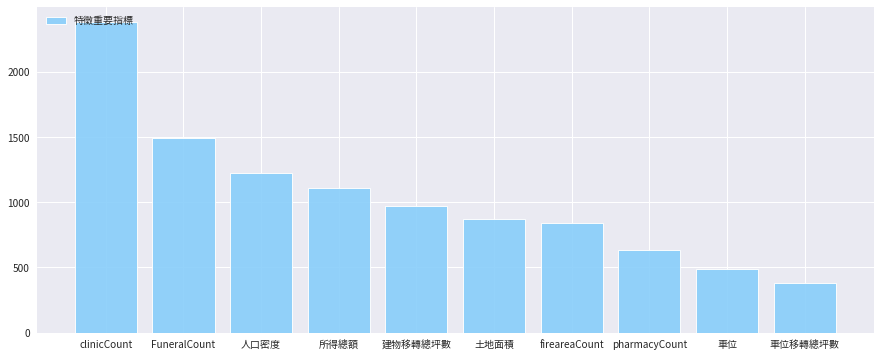

In [153]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(15,6))
plt.bar(feature_scores_df.head(10)['features'], feature_scores_df.head(10)['scores'], alpha=0.9, width = 0.8, facecolor = 'lightskyblue', edgecolor = 'white', label='特徵重要指標', lw=1)
plt.legend(loc="upper left")
plt.savefig('台北新成屋特徵重要性.png')

<b>新成屋的角度來看</b><br>
1、區域的特性對單坪房價影響最為劇烈：例如區域人口密度、所得總額等<br>
2、物件本身的特性影響次之：如建物轉移坪數、土地面積對於每坪價格有所影響<br>
3、特別點：台北市新成屋受到當地醫療機構數量影響較大，尤其是診所、藥房

In [11]:
feature_scores_df = feature_scores_df[feature_scores_df['scores'] > 200]
feature_reg = feature_scores_df['features'].tolist()
x_df = x_df[feature_reg]
print(x_df.shape,y_df.shape)
x_df.head()

(5252, 10) (5252,)


,clinicCount,FuneralCount,人口密度,所得總額,建物移轉總坪數,土地面積,fireareaCount,pharmacyCount,車位,車位移轉總坪數
0,290,33,20442,1894842,46.001177,7.6071,41,64,1,7.447550
1,290,33,20442,1894842,36.191101,7.6071,41,64,1,13.421926
2,290,33,20442,1894842,38.656476,7.6071,41,64,1,13.421926
3,290,33,20442,1894842,25.234551,7.6071,41,64,0,0.000000
4,290,33,20442,1894842,38.656476,7.6071,41,64,1,13.424951


根據老師建議，先對資料進行切割，再將X做標準化來預測Y

In [12]:
# 資料區分訓練集、測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, random_state=0)

In [13]:
# 先使用z-score來進行正規化
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled_df.head()

,clinicCount,FuneralCount,人口密度,所得總額,建物移轉總坪數,土地面積,fireareaCount,pharmacyCount,車位,車位移轉總坪數
0,0.004426,-0.176246,0.846999,1.195303,0.530257,-0.839068,1.631106,0.529374,1.278820,1.155614
1,-0.224128,-0.718882,-0.559211,0.471239,-0.020064,0.214601,0.658752,-0.369628,-0.039492,0.316860
2,-0.224128,-0.718882,-0.559211,0.471239,-0.729285,0.214601,0.658752,-0.369628,-0.039492,-0.621621
3,-0.538388,-0.560613,-1.179755,-0.313834,0.055062,1.520264,-1.130379,0.049907,-0.039492,0.440031
4,3.244169,1.451660,1.857921,2.455271,-0.483592,-0.831118,-0.235814,1.368443,-0.039492,0.120206


### 確認一下變換後的結果

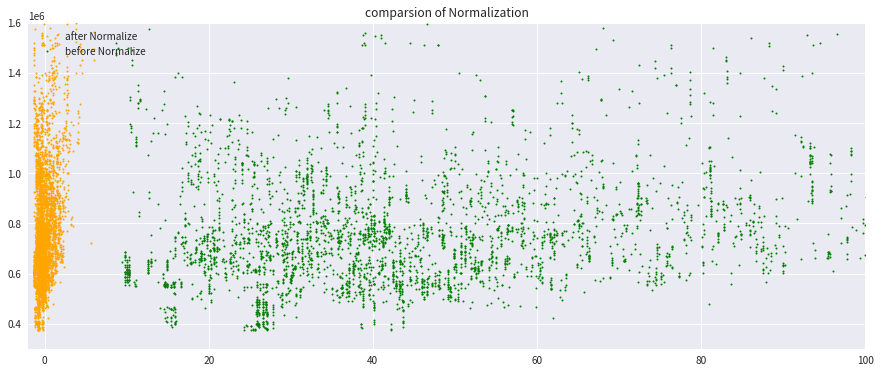

In [154]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(15,6))
plt.plot(X_train_scaled_df['建物移轉總坪數'], y_train, 'o', color='orange', markersize=2,label='after Normalize')
plt.plot(X_train['建物移轉總坪數'], y_train, 'o', color='green', markersize=2,label='before Normalize')
plt.ylim(300000,1600000)
plt.xlim(-2,100)
plt.legend(loc="upper left")
plt.title('comparsion of Normalization')
plt.savefig('特徵正規化比較.png')

## Let's build our Regression Model

### Polynomial

class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Poly_score = []

for d in range(1,7):
    poly = PolynomialFeatures(degree = d)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.fit_transform(X_test_scaled)
    linreg = LinearRegression().fit(X_train_poly, y_train)
    Poly_score.append([d,linreg.score(X_train_poly, y_train),linreg.score(X_test_poly, y_test)])
pd.DataFrame(Poly_score, columns=['Degree','R2(Training)','R2 (Test)'])

,Degree,R2(Training),R2 (Test)
0,1,0.567830,5.264196e-01
1,2,0.673291,6.211999e-01
2,3,0.739259,6.455234e-01
3,4,0.786315,-2.909753e+02
4,5,0.823854,-3.699643e+17
5,6,0.861364,-7.255358e+11


### Lasso

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [15]:
import numpy as np
from sklearn.linear_model import Lasso

ridge_score = []

count = np.linspace(0.00000001,1000000,100)

for alpha in count:
    linridge = Lasso(alpha).fit(X_train_scaled, y_train)
    ridge_score.append([alpha,linridge.score(X_train_scaled, y_train),linridge.score(X_test_scaled, y_test)])
    
ridge_score_df = pd.DataFrame(ridge_score, columns=['alpha','R2(Training)','R2 (Test)'])
ridge_score_df.head()

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3022379394280.1562, tolerance: 27513264754.279976
  model = cd_fast.enet_coordinate_descent(


,alpha,R2(Training),R2 (Test)
0,1.000000e-08,0.567830,0.526420
1,1.010101e+04,0.530828,0.495186
2,2.020202e+04,0.515251,0.477313
3,3.030303e+04,0.489443,0.449351
4,4.040404e+04,0.455229,0.413641


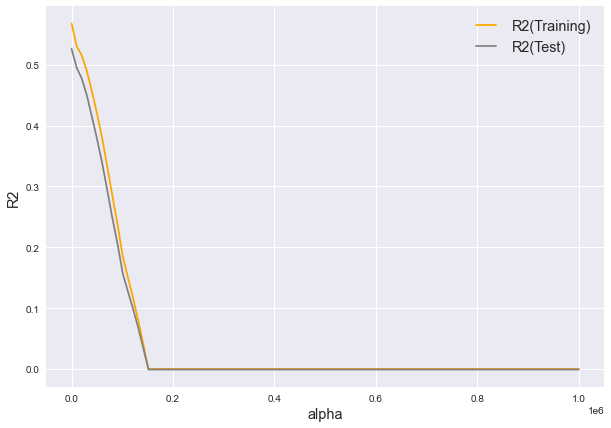

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(ridge_score_df['alpha'], ridge_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(ridge_score_df['alpha'], ridge_score_df['R2 (Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('alpha',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

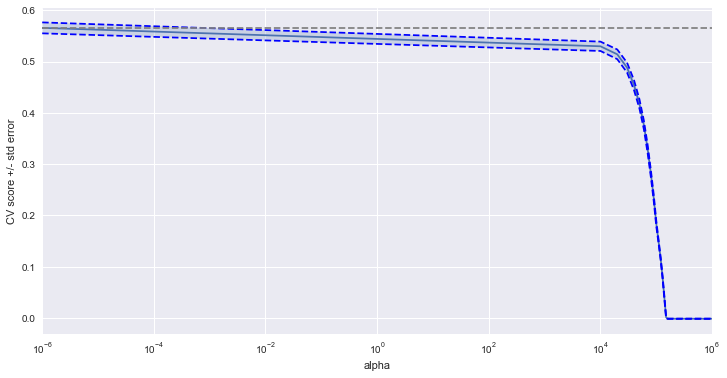

{'alpha': 1e-06}


In [22]:
#網格搜索並且簡單用K_fold來檢查
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# set model
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.linspace(0.000001,1000000,100)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(12, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
# plt.ylim(0.49, 0.58)
plt.show()
print(clf.best_params_)

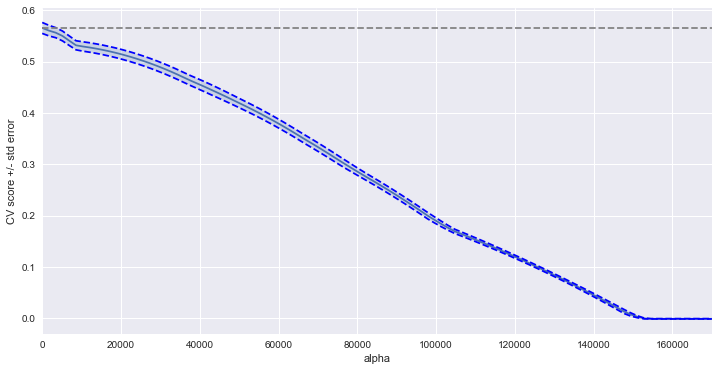

{'alpha': 1e-06}


In [29]:
#網格搜索並且簡單用K_fold來檢查
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# set model
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.linspace(0.000001,170000,100)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(12, 6)
plt.plot(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.plot(alphas, scores + std_error, 'b--')
plt.plot(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
# plt.ylim(0.49, 0.58)
plt.show()
print(clf.best_params_)

# SVR

class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

先搜尋較大的範圍，再用網格搜索來做搜尋

In [31]:
import numpy as np
from sklearn.svm import SVR
svr_score = []

count = np.linspace(0.01,0.1,10)

for g in count:
    svr_model = SVR(kernel='rbf',gamma=g).fit(X_train_scaled, y_train)
    svr_score.append([g,svr_model.score(X_train_scaled, y_train),svr_model.score(X_test_scaled, y_test)])
    
svr_score_df = pd.DataFrame(svr_score, columns=['gamma','R2(Training)','R2 (Test)'])
svr_score_df.head()

,gamma,R2(Training),R2 (Test)
0,0.01,-0.038498,-0.047575
1,0.02,-0.038163,-0.047263
2,0.03,-0.037996,-0.047105
3,0.04,-0.037914,-0.047024
4,0.05,-0.037883,-0.046990


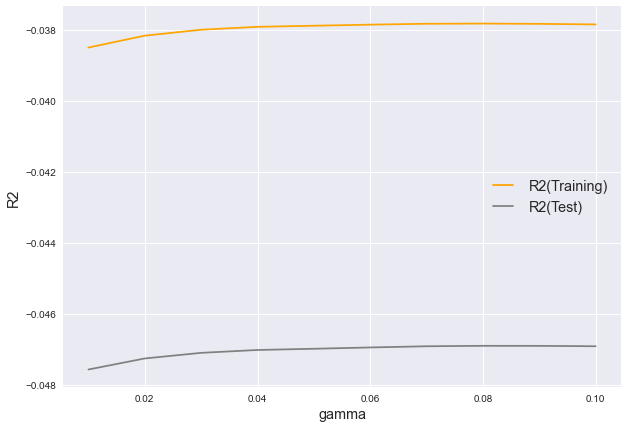

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(svr_score_df['gamma'], svr_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(svr_score_df['gamma'], svr_score_df['R2 (Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('gamma',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [50]:
import numpy as np
from sklearn.svm import SVR
svr_score_c = []

count = np.linspace(1000,1000000,10)

for c in count:
    svr_model_c = SVR(kernel='rbf', C=c).fit(X_train_scaled, y_train)
    svr_score_c.append([c,svr_model_c.score(X_train_scaled, y_train),svr_model_c.score(X_test_scaled, y_test)])
    
svr_score_c_df = pd.DataFrame(svr_score_c, columns=['C','R2(Training)','R2(Test)'])
svr_score_c_df

,C,R2(Training),R2(Test)
0,1000.0,0.327629,0.300265
1,112000.0,0.696675,0.638595
2,223000.0,0.718053,0.656142
3,334000.0,0.723987,0.660733
4,445000.0,0.730617,0.664529
5,556000.0,0.736037,0.666896
6,667000.0,0.738680,0.668074
7,778000.0,0.740697,0.666866
8,889000.0,0.742487,0.666699
9,1000000.0,0.744211,0.666672


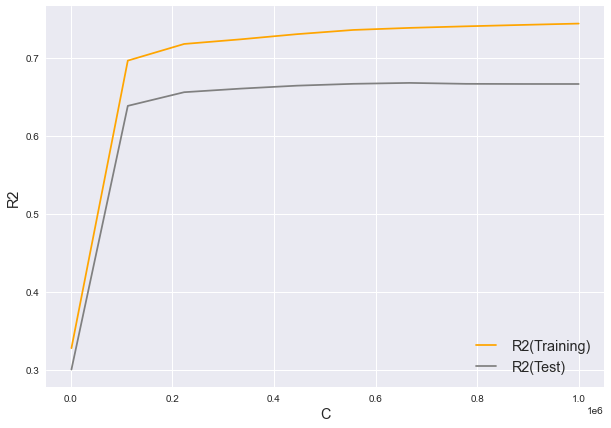

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(svr_score_c_df['C'], svr_score_c_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(svr_score_c_df['C'], svr_score_c_df['R2(Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('C',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [49]:
#網格搜索並且簡單用K_fold來檢查
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# set model
svr_c = np.linspace(10000000,500000000,5)
# n_folds = 5
parameters = {'C':svr_c}

clf = GridSearchCV(SVR(), parameters)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print(clf.best_params_)

{'C': 10000000.0}


<ipython-input-139-411c5800b68e>:16: UserWarning: Attempting to set identical left == right == 100000000 results in singular transformations; automatically expanding.
  plt.xlim(100000000,100000000)


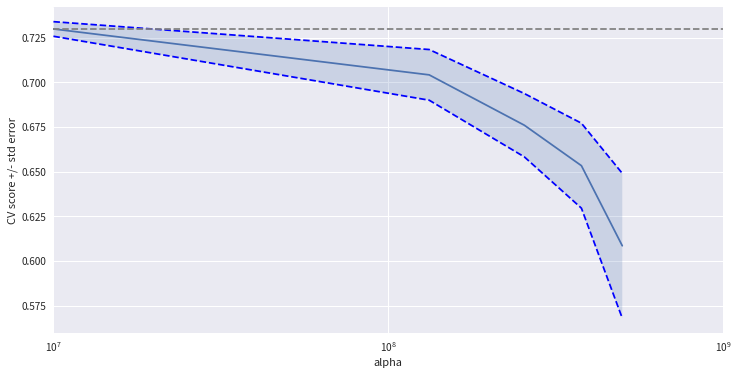

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure().set_size_inches(12, 6)
plt.semilogx(svr_c, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(svr_c, scores + std_error, 'b--')
plt.semilogx(svr_c, scores - std_error, 'b--')
plt.fill_between(svr_c, scores + std_error, scores - std_error, alpha = 0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim(100000000,100000000)
plt.show()

### Random Forest

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [56]:
from sklearn.ensemble import RandomForestRegressor

RFG_score = []

for n in range(1,40,2):
    RFG = RandomForestRegressor(n_estimators=n).fit(X_train_scaled, y_train)
    RFG_score.append([n,RFG.score(X_train_scaled, y_train),RFG.score(X_test_scaled, y_test)])

RFG_score_df = pd.DataFrame(RFG_score, columns=['n_estimators','R2(Training)','R2 (Test)'])
RFG_score_df.head()

,n_estimators,R2(Training),R2 (Test)
0,1,0.941363,0.819523
1,3,0.968615,0.846972
2,5,0.974012,0.860170
3,7,0.975677,0.874816
4,9,0.976450,0.868872


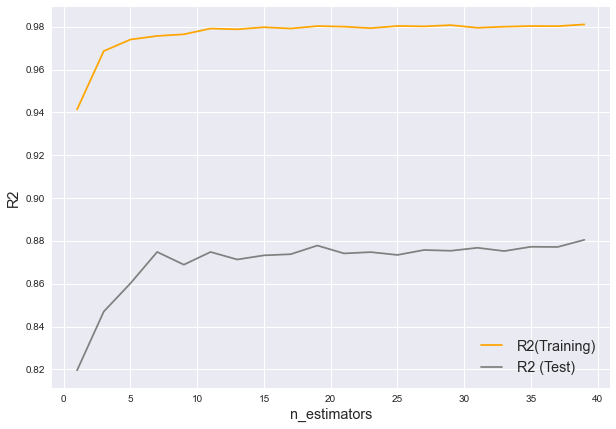

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(RFG_score_df['n_estimators'], RFG_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(RFG_score_df['n_estimators'], RFG_score_df['R2 (Test)'], color='gray',label = 'R2 (Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('n_estimators',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [18]:
#網格搜索並且簡單用K_fold來檢查
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# set model

n = range(1,40,2)
parameters = {'n_estimators':n}
n_folds = 5

clf = GridSearchCV(RandomForestRegressor(), parameters, cv=n_folds)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print(clf.best_params_)

{'n_estimators': 15}


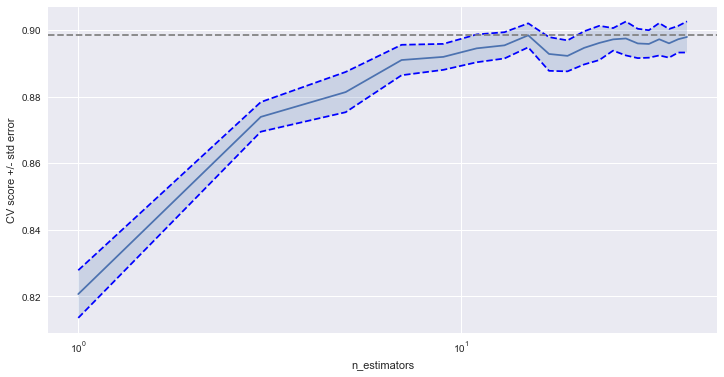

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure().set_size_inches(12, 6)
plt.semilogx(n, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(n, scores + std_error, 'b--')
plt.semilogx(n, scores - std_error, 'b--')

plt.fill_between(n, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('n_estimators')
plt.axhline(np.max(scores), linestyle='--', color='.5')
# plt.ylim(0.49, 0.58)
plt.savefig('隨機森林得分圖.png')
plt.show()


### GradientBoostingRegressor

class sklearn.ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_score = []

for n in range(1,200,10):
    GBR = GradientBoostingRegressor(n_estimators=n).fit(X_train_scaled, y_train)
    GBR_score.append([n,GBR.score(X_train_scaled, y_train),GBR.score(X_test_scaled, y_test)])

GBR_score_df = pd.DataFrame(GBR_score, columns=['n_estimators','R2(Training)','R2 (Test)'])
GBR_score_df.tail(10)

,n_estimators,R2(Training),R2 (Test)
10,101,0.816395,0.751985
11,111,0.824637,0.758333
12,121,0.832935,0.766254
13,131,0.839068,0.770292
14,141,0.844122,0.772940
15,151,0.849720,0.777601
16,161,0.853759,0.780000
17,171,0.858801,0.784674
18,181,0.862839,0.788197
19,191,0.867564,0.792549


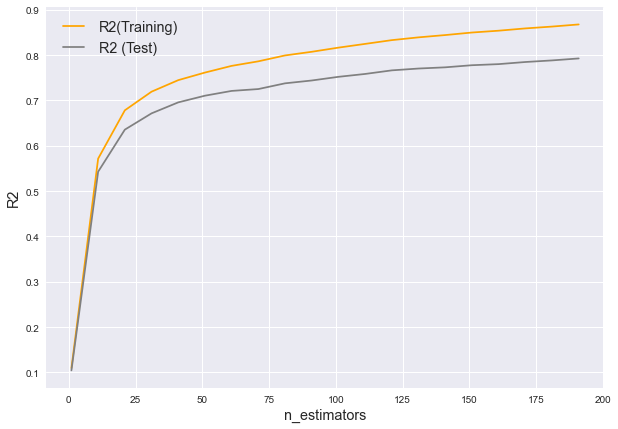

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(GBR_score_df['n_estimators'], GBR_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(GBR_score_df['n_estimators'], GBR_score_df['R2 (Test)'], color='gray',label = 'R2 (Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('n_estimators',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

In [40]:
#網格搜索並且簡單用K_fold來檢查
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# GBR_n = range(10,3000,300)
GBR_n = [1000,1500,2000,2500,3000] # 跑的時間較久，所以直接用5個數字
parameters = {'n_estimators':GBR_n}
n_folds = 5

clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=n_folds)
clf.fit(X_train_scaled, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print(clf.best_params_)

{'n_estimators': 2500}


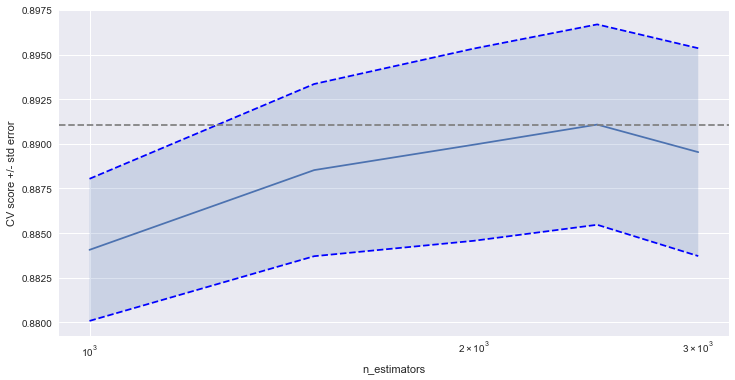

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.figure().set_size_inches(12, 6)
plt.semilogx(GBR_n, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(GBR_n, scores + std_error, 'b--')
plt.semilogx(GBR_n, scores - std_error, 'b--')

plt.fill_between(GBR_n, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('n_estimators')
plt.axhline(np.max(scores), linestyle='--', color='.5')
# plt.ylim(0.49, 0.58)
plt.savefig('GradientBoostingRegressor.png')
plt.show()


### K_fold來確認模型得分

只有檢查折數為5和10的得分

In [155]:
# 交叉比對，分為K摺來進行每個模型的比對
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

x_test_k = np.concatenate((X_train_scaled, X_test_scaled), axis = 0)
y_test_k = np.concatenate((y_train, y_test), axis = 0)

result = []

linridge_k = Lasso(alpha=1e-06)
SVR_k = SVR(kernel = 'rbf', C = 200000)
RFG_k = RandomForestRegressor(n_estimators = 15)
GBR_k = GradientBoostingRegressor(n_estimators = 2500)

k_models = ['linridge','SVR','RFG','GBR']
kflod_n = [5,10]

for k in kflod_n:
    cross_val_list = []
    cross_val_list.append(np.mean(cross_val_score(linridge_k, x_test_k, y_test_k, scoring = 'r2', cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(SVR_k, x_test_k, y_test_k, scoring = 'r2', cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(RFG_k, x_test_k, y_test_k, scoring = 'r2', cv = k).tolist()))
    cross_val_list.append(np.mean(cross_val_score(GBR_k, x_test_k, y_test_k, scoring = 'r2', cv = k).tolist()))
    result.append(cross_val_list)
kfold_df = pd.DataFrame(result, columns = k_models, index = kflod_n)
kfold_df.head()

,linridge,SVR,RFG,GBR
5,0.554618,0.694938,0.900297,0.896710
10,0.552642,0.696412,0.902867,0.899348


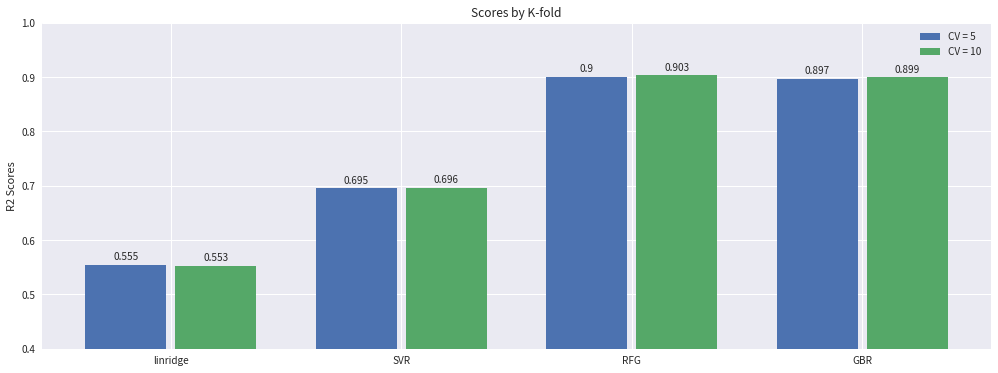

In [162]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(k_models))
width = 0.35 

fig, ax = plt.subplots(figsize=(17,6))
rects1 = ax.bar(x - width/2-0.02, kfold_df.iloc[0,:].tolist(), width, label='CV = 5')
rects2 = ax.bar(x + width/2+0.02, kfold_df.iloc[1,:].tolist(), width, label='CV = 10')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Scores')
ax.set_title('Scores by K-fold')
ax.set_xticks(x)
ax.set_xticklabels(k_models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0.4,1)
plt.savefig('各種模型比較.png')
plt.show()

### 大表加上預測價格

In [47]:
from sklearn.ensemble import RandomForestRegressor
RFG_final = RandomForestRegressor(n_estimators = 15).fit(X_train_scaled,y_train)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

y_pred = pd.DataFrame(RFG_final.predict(x_scaled),columns=['預測每坪單價'])

result_df = pd.concat([x_df, y_df], axis = 1)
result_df = pd.concat([result_df, y_pred], axis = 1)
result_df.to_csv('./done_data/new_house_pred.csv', index = False)
result_df.head()

,clinicCount,FuneralCount,人口密度,所得總額,建物移轉總坪數,土地面積,fireareaCount,pharmacyCount,車位,車位移轉總坪數,每坪單價,預測每坪單價
0,290,33,20442,1894842,46.001177,7.6071,41,64,1,7.447550,9.726710e+05,9.695234e+05
1,290,33,20442,1894842,36.191101,7.6071,41,64,1,13.421926,1.040879e+06,1.049733e+06
2,290,33,20442,1894842,38.656476,7.6071,41,64,1,13.421926,9.332429e+05,9.733336e+05
3,290,33,20442,1894842,25.234551,7.6071,41,64,0,0.000000,9.479074e+05,8.249991e+05
4,290,33,20442,1894842,38.656476,7.6071,41,64,1,13.424951,9.729884e+05,9.733336e+05


In [48]:
# 將預測結果按照區域進行整合
# 需要將原有的比格進行整合
# df是原本的大表

raw_df = pd.read_csv('./done_data/new_house_merge.csv')


RFG_final = RandomForestRegressor(n_estimators = 15).fit(X_train_scaled,y_train)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

y_pred = pd.DataFrame(RFG_final.predict(x_scaled),columns=['預測每坪單價'])
result_df = pd.concat([raw_df, y_pred], axis = 1)
print(result_df.columns.tolist())
result_df.head()

['鄉鎮市區', '土地移轉總坪數', '都市土地使用分區', '總樓層數', '主要用途', '主要建材', '建物移轉總坪數', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '建物現況格局-隔間', '有無管理組織', '每坪單價', '車位類別', '車位移轉總坪數', '土地', '建物', '車位', '轉移樓層', '建物類型', 'Area', 'EightCount', 'ParkCount', 'FuneralCount', 'GasCount', 'CrimeCount', 'PoliceCount', 'busCount', 'subwayCount', 'govCount', 'clinicCount', 'hospitalCount', 'pharmacyCount', 'fireareaCount', 'firewayCount', '土地面積', '總人口數', '男性人數', '女性人數', '人口密度', '每戶人數', '每戶成年人數', '所得收入總計', '可支配所得', '消費支出', '儲蓄', '所得總額', '預測每坪單價']


,鄉鎮市區,土地移轉總坪數,都市土地使用分區,總樓層數,主要用途,主要建材,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,...,女性人數,人口密度,每戶人數,每戶成年人數,所得收入總計,可支配所得,消費支出,儲蓄,所得總額,預測每坪單價
0,中正區,5.599275,住,13,住家用,混凝土造,46.001177,3,2,2,...,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842,1.005855e+06
1,中正區,4.652450,住,10,住家用,鋼筋混凝土造,36.191101,1,1,1,...,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842,1.007770e+06
2,中正區,5.154600,住,10,住家用,鋼筋混凝土造,38.656476,1,1,1,...,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842,9.821454e+05
3,中正區,5.112250,住,10,住家用,鋼筋混凝土造,25.234551,1,1,1,...,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842,8.298399e+05
4,中正區,5.154600,住,10,住家用,鋼筋混凝土造,38.656476,1,1,1,...,81511,20442,2.83,2.39,1744835,1450563,1171917,278646,1894842,9.821454e+05


In [49]:
result_byarea_df = result_df.groupby('鄉鎮市區').mean()
compar_price = result_byarea_df[['每坪單價','預測每坪單價','建物移轉總坪數' , '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '車位移轉總坪數']]
compar_price = compar_price.sort_values(['預測每坪單價'], ascending=False)
compar_price

,每坪單價,預測每坪單價,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總坪數
鄉鎮市區,,,,,,,
大安區,1.235560e+06,1.248056e+06,46.023976,1.829582,1.225080,1.173633,9.826922
中正區,9.787425e+05,9.822753e+05,39.500507,2.063781,1.494305,1.396355,7.531975
中山區,9.836895e+05,9.797211e+05,53.813638,1.687135,1.162281,1.397661,11.050432
松山區,9.923114e+05,9.741960e+05,79.332757,2.148148,1.037037,1.592593,16.358416
信義區,8.935587e+05,8.858093e+05,56.494633,1.855556,1.372222,1.077778,10.562511
南港區,8.655194e+05,8.554700e+05,41.324798,2.017964,1.395210,1.053892,7.536199
士林區,8.315700e+05,8.275598e+05,66.036940,1.570248,1.140496,1.144628,13.623951
內湖區,7.477358e+05,7.444044e+05,60.194565,1.778679,1.228273,1.205098,11.529338
大同區,7.522865e+05,7.415734e+05,47.027940,2.735484,1.774194,1.622581,9.005503


In [50]:
result_df['土地'] == 1
result_count_df = result_df.groupby('鄉鎮市區').count()
result_count_df['土地']

鄉鎮市區
中山區    684
中正區    439
信義區    180
內湖區    863
北投區    993
南港區    167
士林區    242
大同區    310
大安區    311
文山區    511
松山區     81
萬華區    471
Name: 土地, dtype: int64

In [52]:
compar_price = compar_price.merge(result_count_df['土地'], left_on='鄉鎮市區', right_on='鄉鎮市區')
compar_price

,每坪單價,預測每坪單價,建物移轉總坪數,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總坪數,土地
鄉鎮市區,,,,,,,,
大安區,1.235560e+06,1.248056e+06,46.023976,1.829582,1.225080,1.173633,9.826922,311
中正區,9.787425e+05,9.822753e+05,39.500507,2.063781,1.494305,1.396355,7.531975,439
中山區,9.836895e+05,9.797211e+05,53.813638,1.687135,1.162281,1.397661,11.050432,684
松山區,9.923114e+05,9.741960e+05,79.332757,2.148148,1.037037,1.592593,16.358416,81
信義區,8.935587e+05,8.858093e+05,56.494633,1.855556,1.372222,1.077778,10.562511,180
南港區,8.655194e+05,8.554700e+05,41.324798,2.017964,1.395210,1.053892,7.536199,167
士林區,8.315700e+05,8.275598e+05,66.036940,1.570248,1.140496,1.144628,13.623951,242
內湖區,7.477358e+05,7.444044e+05,60.194565,1.778679,1.228273,1.205098,11.529338,863
大同區,7.522865e+05,7.415734e+05,47.027940,2.735484,1.774194,1.622581,9.005503,310


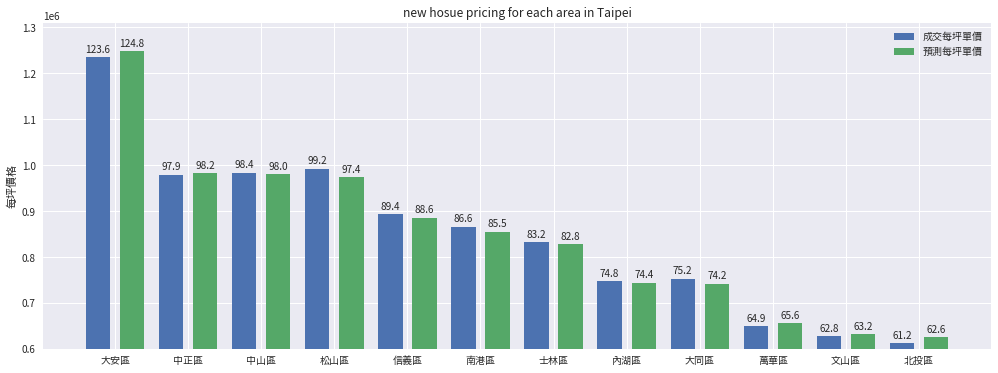

In [163]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


area_list = compar_price.index.tolist()
x = np.arange(len(area_list))
width = 1
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
fig, ax = plt.subplots(figsize=(17,6))
rects1 = ax.bar(x*3 - width/2-0.2, compar_price.iloc[:,0].tolist(), width, label='成交每坪單價')
rects2 = ax.bar(x*3 + width/2+0.2, compar_price.iloc[:,1].tolist(), width, label='預測每坪單價')

ax.set_ylabel('每坪價格')
ax.set_title('new hosue pricing for each area in Taipei')
ax.set_xticks(x*3)
ax.set_xticklabels(area_list)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height/10000,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(600000,)
plt.savefig('台北市區域單價格.png')
plt.show()

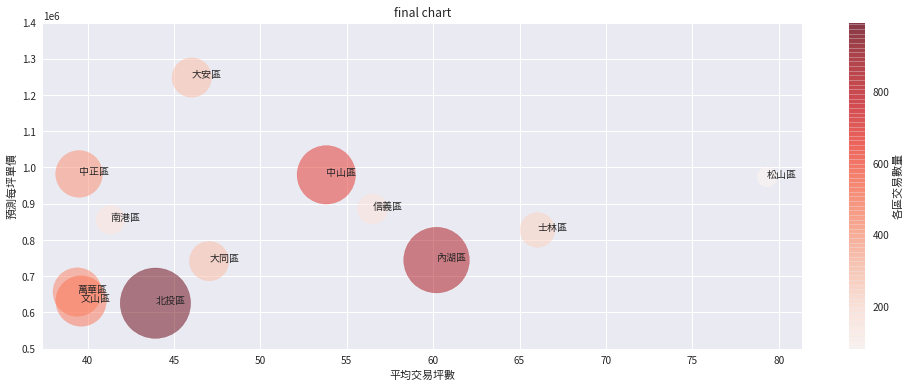

In [152]:
%matplotlib inline
from matplotlib import pyplot as plt
rng=np.random.RandomState(0)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize=(17,6))
size = compar_price['土地']
colors = compar_price['土地']
plt.scatter(compar_price['建物移轉總坪數'], compar_price['預測每坪單價'],
            s=size*5,
            c=colors,
            marker='o',
            alpha=0.5,
            cmap='Reds')
area_list = compar_price.index.tolist()
count = 0
for xy in zip(compar_price['建物移轉總坪數'].tolist(), compar_price['預測每坪單價'].tolist()):
    plt.annotate(area_list[count], xy = xy)
    count = count + 1

plt.ylim(500000,1400000)
# plt.xlim(-2,100)
# plt.legend(loc="upper left")
plt.title('final chart')
plt.xlabel('平均交易坪數')
plt.ylabel('預測每坪單價')
plt.colorbar(label='各區交易數量')
plt.savefig('台北市新成屋房價比較表.png')
